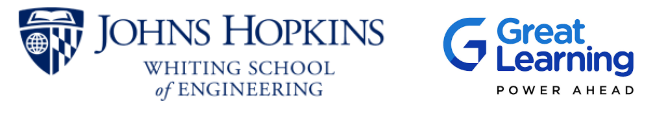

<font size=10>**Mid-term Project**</font>

<font size=6>**Your AI Email Secretary**</font>

# **Business Problem - Automating Email Prioritization & Responses**



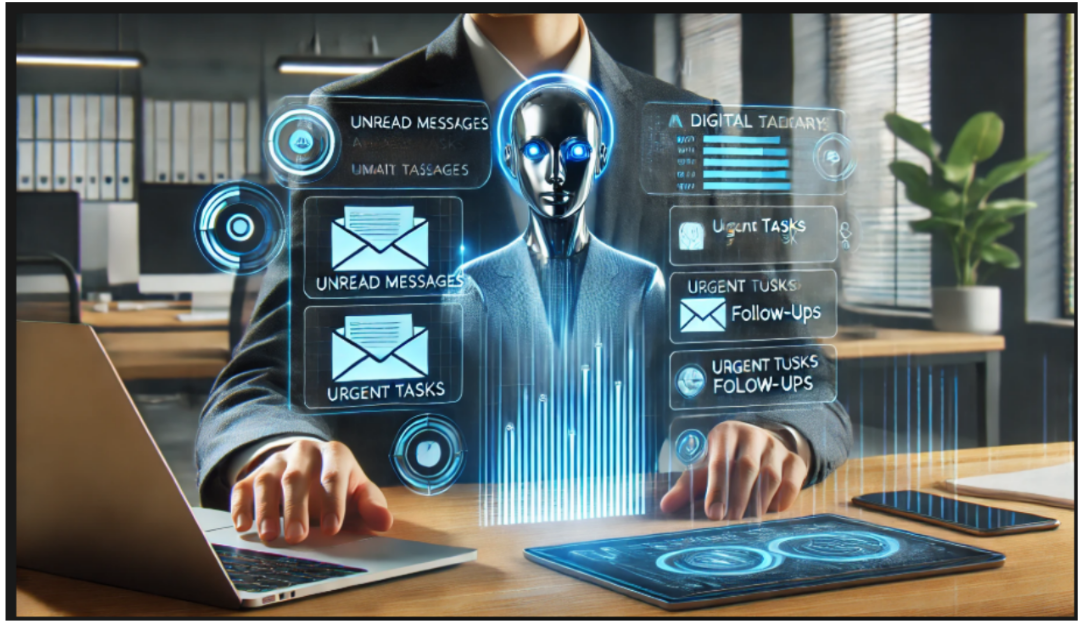

**Alex Carter**, a seasoned **Senior Manager in Software Development** at **Orion Tech Solutions**, plays a pivotal role in ensuring the smooth execution of multiple IT projects. Orion Tech Solutions, a **mid-sized IT services company**, prides itself on delivering cutting-edge software solutions to global clients, balancing innovation with operational efficiency.

With years of experience in software engineering and project management, Alex’s day is a mix of **strategic planning, problem-solving, and stakeholder coordination**. Managing a diverse portfolio of projects, Alex works closely with **internal teams, vendors, and clients**, ensuring deliverables meet expectations while navigating technical and organizational challenges.


**The Challenge**

A high-profile client has recently entrusted Orion Tech Solutions with the development of a **next-generation cloud security platform**. While the project holds immense potential for growth and recognition, it also brings **complexity, tight deadlines, and high stakeholder expectations**.

As the project nears critical milestones, Alex faces **multiple challenges:**

* Ensuring **timely delivery** while balancing **resource constraints**.
* Managing **escalations** related to security vulnerabilities discovered during testing.
* Communicating with **clients, vendors, and internal teams** to align expectations.
* Handling **unexpected system downtimes** due to scheduled IT maintenance.
* Addressing **compliance concerns** raised by the legal team on certain third-party integrations.

With multiple stakeholders relying on Alex’s leadership, **clear and effective communication** is essential. Every email, meeting, and decision made plays a role in determining the project's success.

### **The Case Study**
This case study explores the **real-world challenges** Alex encounters, highlighting how well-structured communication can help in:
1. **Crisis Management** – Handling security breaches and system outages.
2. **Client Relations** – Effectively communicating progress and addressing feedback.
3. **Team Coordination** – Ensuring alignment between development, security, and operations teams.
4. **Strategic Decision-Making** – Navigating legal, financial, and technical roadblocks.

Through **realistic scenarios and email exchanges**, we will examine how Alex can **leverage professional communication strategies** to tackle these challenges head-on, ensuring **project success and business continuity**.

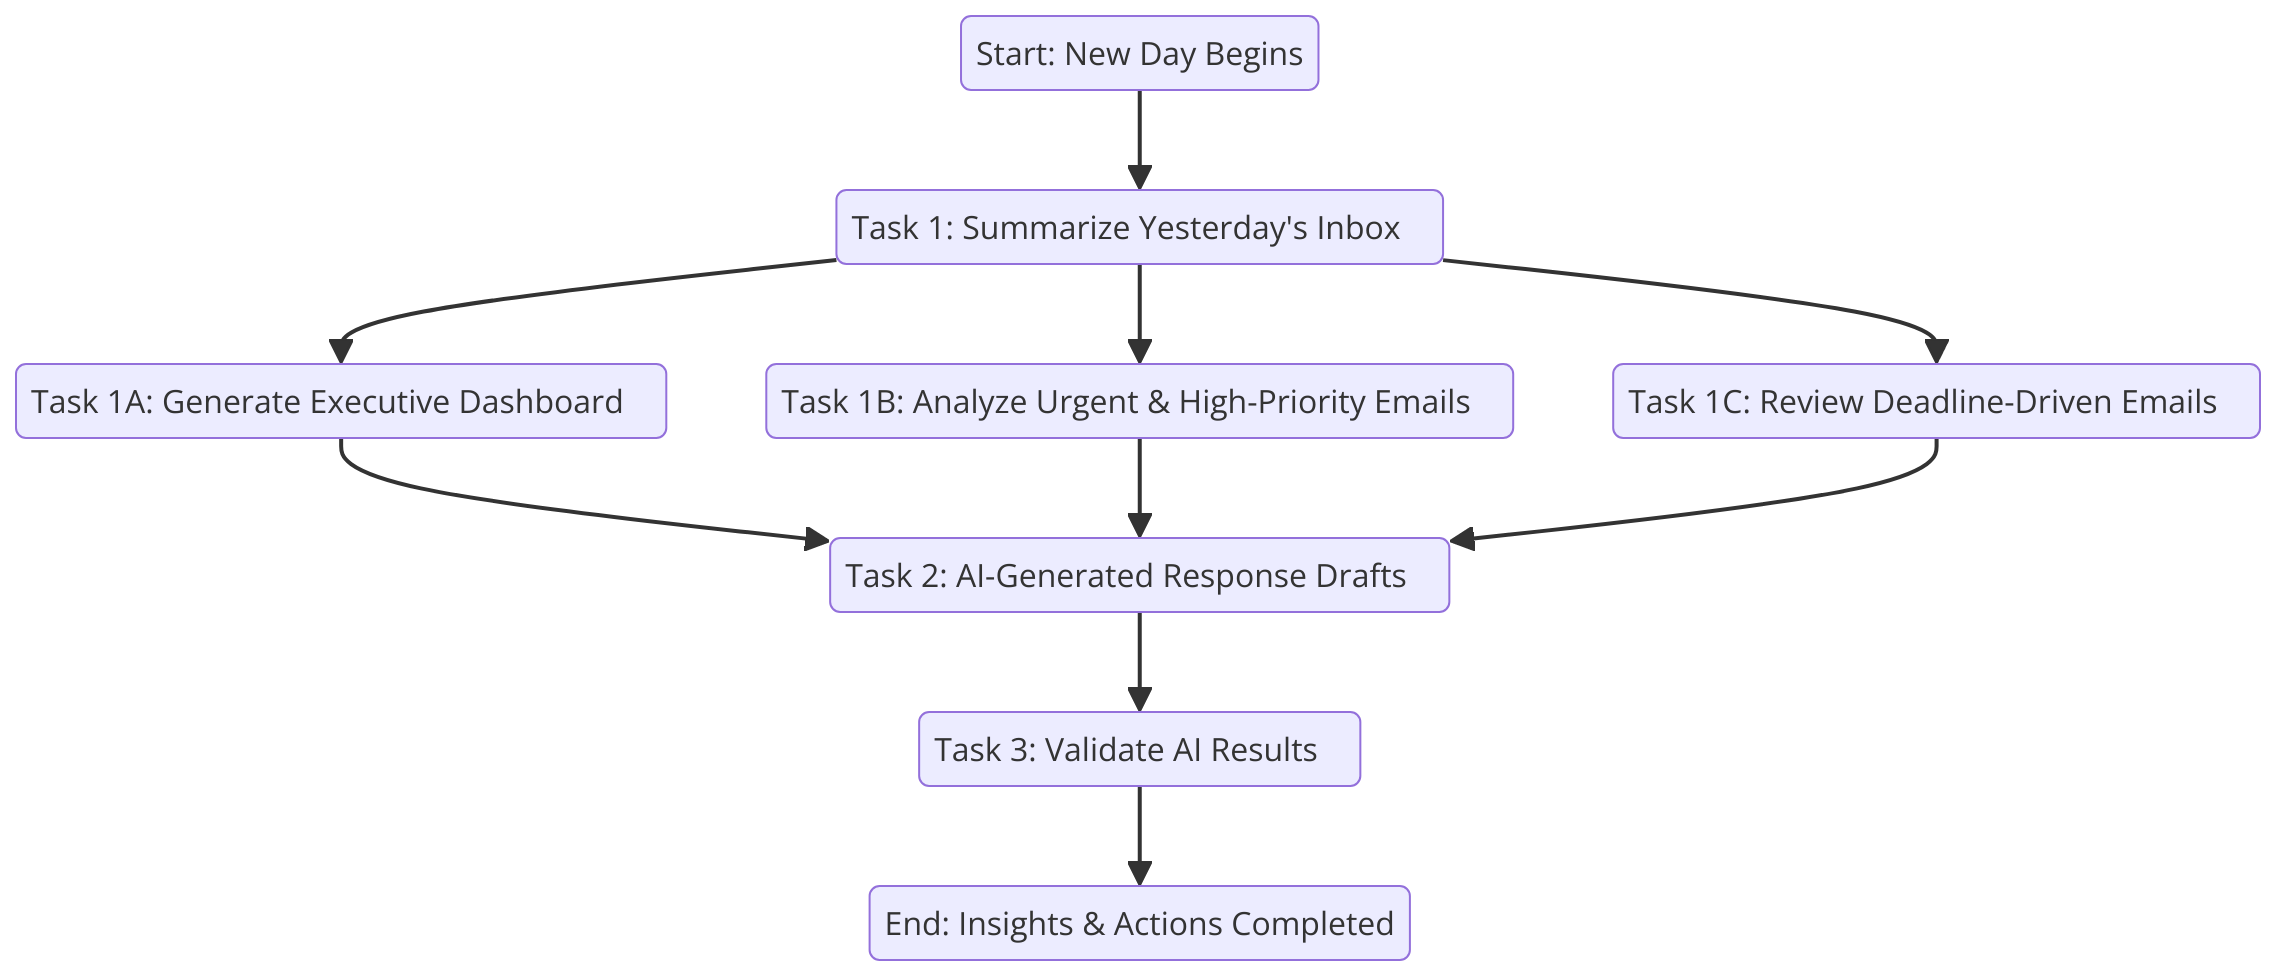

### **Objective**

The goal of this project is to create a Generative AI-powered system that:
1. **Summarize** yesterday’s emails into actionable insights. [Yesterbox Approach]
2. **Prioritizes** emails based on urgency, sender, and context.
3. **Drafts** context-aware responses, reducing manual effort.



# **LLM Setup**



In [6]:
!pip install -q openai==1.61.1
!pip install controlflow


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 36.1 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 35.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 46.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 31.5 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 638.5/638.5 kB 19.3 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 51.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 951.7/951.7 kB 36.3 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 33.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 714.0/714.0 kB 17.8 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 61.4 MB/s  0:00:00 eta 0:00:01
  Attempting uninstall: rich╸━━━━━━━━━━━━━━━━━━━ 43/83 [starlette]
    Found existing installation: rich 14.1.0━━━━━━━━━━

- The `config.json` file should contain **API_KEY** and **API Base URL** provided by OpenAI.
- You need to insert your actual API keys and endpoint URL obtained from your Olympus account. Refer to the **OpenAI Access Token documentation** for more information on how to generate and manage your API keys.
- This code reads the `config.json` file and extracts the API details.
  - The `API_KEY` is a **unique secret key** that authorizes your requests to OpenAI's API.
  - The `OPENAI_API_BASE` is the **API Base URL** where the model will process your requests.

**What To Do?**
- Use the sample `config.json` file provided.
- Add their **OpenAI API Key** and **Base URL** to the file.
- The `config.json` should look like this:

  ```
  {
        "API_KEY": "your_openai_api_key_here",
        "OPENAI_API_BASE": "https://your_openai_api_base/v1"
      }
  ```

In [3]:
# @title Loading the `config.json` file
import json
from IPython.display import display, Markdown


# Load the JSON file and extract values
file_name = 'config.json'
with open(file_name, 'r') as file:
    config = json.load(file)
    API_KEY = config.get("API_KEY") # Loading the API Key
    OPENAI_API_BASE = config.get("OPENAI_API_BASE") # Loading the API Base Url

In [4]:
model_name = "gpt-4o-mini"

- The API key and base URL are stored in environment variables to avoid hardcoding sensitive information in the code.
- The `OpenAI()` object helps us interact with the model for prompt generation.


In [7]:
from openai import OpenAI
import os

# Storing API credentials in environment variables
os.environ['OPENAI_API_KEY'] = API_KEY
os.environ["OPENAI_BASE_URL"] = OPENAI_API_BASE

# Initialize OpenAI client
client = OpenAI()

# great learnign people i do it this way, but you can try the above

In [8]:
#Pedro's way of doing open AI, igonre previous code
import os
from openai import OpenAI

# Initialize the OpenAI client
client = OpenAI(api_key=API_KEY)  # Replace with your actual API key

# Create a chat completion
completion = client.chat.completions.create(
    model=model_name,
    messages=[
        {"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": "Hello, how are you. are you alive?"}
    ]
)

# Print the assistant's reply
print(completion.choices[0].message.content)


Hello! I'm just a computer program, so I don't have feelings or consciousness—I'm here to assist you. How can I help you today?


# WE DONT NEED LLM Function anymore

# **Data Setup**


### **Background**

**Name**: Alex Carter  
**Company**: Orion Tech Solutions (A mid-sized IT services company)  
**Role**: Senior Manager, Software Developement  

#### **About You**  
Alex oversees multiple projects related to software development and IT infrastructure. Your role involves coordinating with stakeholders, ensuring timely delivery, handling escalations, and approving critical project-related decisions. You work with internal teams, vendors, and clients, making communication a crucial part of your job.


**Objective:** Load the dataset containing email records and apply the Yesterbox approach to filter emails received on the previous day.

In [11]:
# @title Step 1: Load the Dataset
# Data Loading

import pandas as pd
df = pd.read_csv("Alex_emails_march_04.csv", index_col="email_id", encoding='latin-1')      #Add the data file location
df.head()


,date_received,sender,subject,body,main_recipient
email_id,,,,,
1,3/3/2025,Julia Martin,Approval Request: Budget Approval Needed by EOD,"Hi Alex,\n\nI hope you're doing well. As we ap...",Alex
2,3/3/2025,Fiona White,Are Your APIs Secure? Reddit & Discord Sound t...,"Hi Alex,\n\nA heated Discord discussion in the...",Alex
3,3/3/2025,Samantha Lee,Approval Needed: Project Scope Adjustment for ...,"Hi Alex,\n\nWeve encountered an unexpected AP...",Alex
4,3/3/2025,James Patel,Subject: Daily Update  Project Titan (March 3),"Hey Alex,\n\nQuick update on Project Titan for...",Alex
5,3/3/2025,David Whitmore,[URGENT] Dashboard Syncing Issues  Production...,"Hey Alex,\n\nWeve got a big issue right nowl...",Alex


In [14]:
# @title Step 2: Apply Yesterbox Filtering
# @markdown The Yesterbox approach involves processing emails from the previous day first before tackling today's emails.

# @markdown For this dataset, consider today's date as 4th March 2025.

# @markdown We filter the dataset to only include emails received on 3rd March 2025 (yesterday)
# (Yesterbox Approach)(Today: 4 march)



from datetime import datetime, timedelta

yesterday_date = pd.to_datetime("3/3/2025").strftime('%m/%d/%Y')

df['date_received'] = pd.to_datetime(df['date_received']).dt.strftime('%m/%d/%Y')

yesterday_emails = df[df['date_received'] == yesterday_date].reset_index(drop=True)
print(f"Filtered Emails Count: {len(yesterday_emails)}")


Filtered Emails Count: 51


In [12]:
df.shape

(60, 5)

In [15]:
yesterday_emails.shape              # Index starts from 0

(51, 5)

In [16]:
#****** Start initializing control flow, so we can start using it:
os.environ['OPENAI_API_KEY'] = API_KEY
import controlflow as cf  # Control Flow for AI Agents
cf.defaults.model = 'openai/' + model_name
cf.settings.enable_default_print_handler = False


/Users/shugney20/Documents/genai/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# **Task 1: Awareness of your email: Get to know the detailed summary of your email received**


**Question:**
Write the `system_prompt` that will guide the AI model to generate an executive summary based on the dataset. The prompt should:

1. Categorize emails into six distinct categories.
  - Urgent & High-Priority Emails (Requires Immediate Action)
  - Deadline-Driven Emails (Deadline is Today or meeting setups)
  - Routine Updates (Review & Acknowledge)
  - Non-Urgent Informational Emails (Deferred or Delegated)
  - Personal & Social Emails
  - Spam/Unimportant Emails

2. Count the number of emails per category.

3. Provide a final AI summary that highlights the number of critical emails requiring immediate action.

In [17]:
#******
#Start defining required agents:

#Categorization Agent
categorization_agent = cf.Agent(
    name="Email Categorization Agent",
    model="openai/" + model_name,
    instructions="""
    You are an expert at classifying emails based on their urgency and importance.
    Categorize emails into one of the following categories:
    - Urgent & High-Priority Emails
    - Deadline-Driven Emails
    - Routine Updates & Check-ins
    - Non-Urgent Informational Emails
    - Personal & Social Emails
    - Spam/Unimportant Emails
    Respond with only the category name.
    """
)

# Email Summarization Agent
email_summarization_agent = cf.Agent(
    name="Email Summarization Agent",
    model="openai/" + model_name,
    instructions="""
    Summarize the content of an email in a concise and informative manner.
    """
)

# Email Response Agent
email_response_agent = cf.Agent(
    name="Email Response Agent",
    model="openai/" + model_name,
    instructions="""
    Generate a meaningful and professional response to the given email.
    """
)

# Executive Summarization Agent
executive_summarization_agent = cf.Agent(
    name="Executive Summarization Agent",
    model="openai/" + model_name,
    instructions="""
    Please analyze the provided emails and generate an Executive Summary that includes the following details:

    1. **Total Number of Emails Received:**
    2. **Total Number of Emails from Yesterday**
    3. **Email Breakdown by Categories (Count Only):**
       - Urgent & High-Priority Emails (Requires Immediate Action)
       - Deadline-Driven Emails (Deadline is Today or Meeting Setups)
       - Routine Updates (Review & Acknowledge)
       - Non-Urgent Informational Emails (Deferred or Delegated)
       - Personal & Social Emails
       - Spam/Unimportant Emails
    4. **AI Conclusion:** Highlight distribution of critical emails (Urgent & High-Priority + Deadline-Driven) requiring immediate attention, versus those that can be reviewed later.

    Structure the response clearly, ensuring readability and accurate email classification.
    """
)


In [18]:
#****** Task 1A is done completely here
categories = ['Urgent & High-Priority Emails',
              'Deadline-Driven Emails',
              'Routine Updates & Check-ins',
              'Non-Urgent Informational Emails',
              'Personal & Social Emails',
              'Spam/Unimportant Emails']

@cf.flow
def email_processing_flow(email_data: pd.DataFrame):
    categorized_emails = []
    summaries = []
    responses = []

    # Process each email
    for _, row in email_data.iterrows():
        email_context = {
            "date_received": row['date_received'],
            "sender": row['sender'],
            "subject": row['subject'],
            "body": row['body'],
            "main_recipient": row['main_recipient']
        }

        category = cf.run(
            "Categorize this email",
            result_type=str,
            agents=[categorization_agent],
            context=email_context
        )

        if category in categories:
            categorized_emails.append(category)
        else:
            categorized_emails.append('Uncategorized')

        # Only generate summary and response for high-priority emails
        if category in ['Urgent & High-Priority Emails', 'Deadline-Driven Emails']:
            summary = cf.run(
                "Summarize this email",
                result_type=str,
                agents=[email_summarization_agent],
                context=email_context
            )

            response = cf.run(
                "Generate a response to this email",
                result_type=str,
                agents=[email_response_agent],
                context=email_context
            )
        else:
            summary = ""  # Empty for other categories
            response = ""  # Empty for other categories

        summaries.append(summary)
        responses.append(response)

    # Assign results to DataFrame
    email_data['category'] = categorized_emails
    email_data['summary'] = summaries
    email_data['response'] = responses

    # Generate overall summary
    summary = cf.run(
        "Generate executive summary of categorized emails",
        result_type=str,
        agents=[executive_summarization_agent],
        context={"categorized_emails": email_data[['category', 'sender', 'subject']].to_string()}
    )

    return summary

In [20]:
#******
# Ensure necessary columns exist
yesterday_emails['category'] = None
yesterday_emails['summary'] = None
yesterday_emails['response'] = None

display(yesterday_emails.head())

,date_received,sender,subject,body,main_recipient,category,summary,response
0,03/03/2025,Julia Martin,Approval Request: Budget Approval Needed by EOD,"Hi Alex,\n\nI hope you're doing well. As we ap...",Alex,None,None,None
1,03/03/2025,Fiona White,Are Your APIs Secure? Reddit & Discord Sound t...,"Hi Alex,\n\nA heated Discord discussion in the...",Alex,None,None,None
2,03/03/2025,Samantha Lee,Approval Needed: Project Scope Adjustment for ...,"Hi Alex,\n\nWeve encountered an unexpected AP...",Alex,None,None,None
3,03/03/2025,James Patel,Subject: Daily Update  Project Titan (March 3),"Hey Alex,\n\nQuick update on Project Titan for...",Alex,None,None,None
4,03/03/2025,David Whitmore,[URGENT] Dashboard Syncing Issues  Production...,"Hey Alex,\n\nWeve got a big issue right nowl...",Alex,None,None,None


In [21]:
#******
# @title Execute Control Flow
result_summary = email_processing_flow(yesterday_emails)


In [22]:
#display executive summary:
display(Markdown(result_summary))

display(Markdown("### Summaries and Responses for Urgent & Deadline-Driven Emails"))
display(yesterday_emails[yesterday_emails['category'].isin(['Urgent & High-Priority Emails', 'Deadline-Driven Emails'])][['category', 'subject', 'summary', 'response']])


1. **Total Number of Emails Received:** 50
2. **Total Number of Emails from Yesterday:** 20
3. **Email Breakdown by Categories (Count Only):**    
   - Urgent & High-Priority Emails: 17    
   - Deadline-Driven Emails: 6   
   - Routine Updates: 10 
   - Non-Urgent Informational Emails: 5   
   - Personal & Social Emails: 1   
   - Spam/Unimportant Emails: 0
4. **AI Conclusion:** A total of 23 critical emails (Urgent & High-Priority + Deadline-Driven) require immediate attention, while 17 emails can be reviewed later.

### Summaries and Responses for Urgent & Deadline-Driven Emails

,category,subject,summary,response
0,Urgent & High-Priority Emails,Approval Request: Budget Approval Needed by EOD,Julia Martin is requesting Alex's approval for...,Subject: Re: Approval Request: Budget Approval...
1,Urgent & High-Priority Emails,Are Your APIs Secure? Reddit & Discord Sound t...,Fiona White raises concerns about API security...,Subject: Re: Are Your APIs Secure? Reddit & Di...
2,Urgent & High-Priority Emails,Approval Needed: Project Scope Adjustment for ...,Samantha Lee informs Alex about an unexpected ...,Subject: Re: Approval Needed: Project Scope Ad...
3,Deadline-Driven Emails,Subject: Daily Update  Project Titan (March 3),James Patel provides a daily update on Project...,Subject: Re: Daily Update – Project Titan (Mar...
6,Urgent & High-Priority Emails,Approval Request: Additional AWS Resources for...,Nathan Cole requests approval from Alex for ad...,Subject: Re: Approval Request: Additional AWS ...
7,Deadline-Driven Emails,Blocking Issue Alert  Client Data Sync Failing,David Kurien alerts Alex about a major issue w...,Subject: Re: Blocking Issue Alert – Client Dat...
8,Urgent & High-Priority Emails,Daily Update  API Migration (March 3),Maria Santos informs Alex about a confirmed bu...,Subject: Re: Urgent: Bug in Payment Processing...
9,Urgent & High-Priority Emails,URGENT: Approval Needed for 2-Week Extension o...,Tanya Patel is requesting a two-week extension...,Subject: Re: URGENT: Approval Needed for 2-Wee...
10,Deadline-Driven Emails,System Crashing During Shift Changes  URGENT,Adam Johnson reports a critical issue regardin...,Subject: Re: Critical Issue: Customer Support ...
11,Urgent & High-Priority Emails,Update  Bug Fixes & Refactoring,Emily Johnson provides an update on bug fixes ...,Subject: Re: Update – Bug Fixes & Refactoring\...


In [23]:
# @title Display the updated DataFrame
yesterday_emails.head()

,date_received,sender,subject,body,main_recipient,category,summary,response
0,03/03/2025,Julia Martin,Approval Request: Budget Approval Needed by EOD,"Hi Alex,\n\nI hope you're doing well. As we ap...",Alex,Urgent & High-Priority Emails,Julia Martin is requesting Alex's approval for...,Subject: Re: Approval Request: Budget Approval...
1,03/03/2025,Fiona White,Are Your APIs Secure? Reddit & Discord Sound t...,"Hi Alex,\n\nA heated Discord discussion in the...",Alex,Urgent & High-Priority Emails,Fiona White raises concerns about API security...,Subject: Re: Are Your APIs Secure? Reddit & Di...
2,03/03/2025,Samantha Lee,Approval Needed: Project Scope Adjustment for ...,"Hi Alex,\n\nWeve encountered an unexpected AP...",Alex,Urgent & High-Priority Emails,Samantha Lee informs Alex about an unexpected ...,Subject: Re: Approval Needed: Project Scope Ad...
3,03/03/2025,James Patel,Subject: Daily Update  Project Titan (March 3),"Hey Alex,\n\nQuick update on Project Titan for...",Alex,Deadline-Driven Emails,James Patel provides a daily update on Project...,Subject: Re: Daily Update – Project Titan (Mar...
4,03/03/2025,David Whitmore,[URGENT] Dashboard Syncing Issues  Production...,"Hey Alex,\n\nWeve got a big issue right nowl...",Alex,Routine Updates & Check-ins,,
